In [1]:
#Data cleaning
import pandas as pd

usdjpy = pd.read_csv("usdjpy_raw.csv")
gold = pd.read_csv("gold_raw.csv")
spx = pd.read_csv("spx_raw.csv")

unrate = pd.read_csv("UNRATE.csv")
cpi = pd.read_csv("CPIAUCSL.csv")
dgs2 = pd.read_csv("DGS2.csv")
dgs5 = pd.read_csv("DGS5.csv")
dgs10 = pd.read_csv("DGS10.csv")

usdjpy.rename(columns={"USDJPY=X": "usdjpy"}, inplace=True)
gold.rename(columns={"GC=F": "gold"}, inplace=True)
spx.rename(columns={"^GSPC": "spx"}, inplace=True)

unrate.rename(columns={"observation_date": "date", "UNRATE": "unrate"}, inplace=True)
cpi.rename(columns={"observation_date": "date", "CPIAUCSL": "cpi"}, inplace=True)
dgs2.rename(columns={"observation_date": "date", "DGS2": "dgs2"}, inplace=True)
dgs5.rename(columns={"observation_date": "date", "DGS5": "dgs5"}, inplace=True)
dgs10.rename(columns={"observation_date": "date", "DGS10": "dgs10"}, inplace=True)

for df in [usdjpy, gold, spx, unrate, cpi, dgs2, dgs5, dgs10]:
    df["date"] = pd.to_datetime(df["date"])

for df in [usdjpy, gold, spx, unrate, cpi, dgs2, dgs5, dgs10]:
    df.sort_values("date", inplace=True)

unrate = unrate.set_index("date").resample("D").ffill().reset_index()
cpi = cpi.set_index("date").resample("D").ffill().reset_index()

dgs2["dgs2"] = dgs2["dgs2"].ffill()
dgs5["dgs5"] = dgs5["dgs5"].ffill()
dgs10["dgs10"] = dgs10["dgs10"].ffill()

merged = usdjpy.merge(gold, on="date", how="inner")
merged = merged.merge(spx, on="date", how="inner")

merged = merged.merge(dgs2, on="date", how="left")
merged = merged.merge(dgs5, on="date", how="left")
merged = merged.merge(dgs10, on="date", how="left")

merged[["dgs2","dgs5","dgs10"]] = merged[["dgs2","dgs5","dgs10"]].ffill()

merged = merged.merge(unrate, on="date", how="left")
merged = merged.merge(cpi, on="date", how="left")

merged.reset_index(drop=True, inplace=True)

print("Missing values check:")
print(merged.isna().sum())

print("\nFirst 10 rows:")
print(merged.head(10))


Missing values check:
date       0
usdjpy     0
gold       0
spx        0
dgs2       0
dgs5       0
dgs10      0
unrate    54
cpi       54
dtype: int64

First 10 rows:
        date      usdjpy         gold          spx  dgs2  dgs5  dgs10  unrate  \
0 2017-01-03  117.495003  1160.400024  2257.830078  1.22  1.94   2.45     4.7   
1 2017-01-04  117.658997  1163.800049  2270.750000  1.24  1.94   2.46     4.7   
2 2017-01-05  117.112999  1179.699951  2269.000000  1.17  1.86   2.37     4.7   
3 2017-01-06  115.264999  1171.900024  2276.979980  1.22  1.92   2.42     4.7   
4 2017-01-09  117.150002  1183.500000  2268.899902  1.21  1.89   2.38     4.7   
5 2017-01-10  115.985001  1184.199951  2268.899902  1.19  1.89   2.38     4.7   
6 2017-01-11  115.872002  1195.599976  2275.320068  1.20  1.89   2.38     4.7   
7 2017-01-12  115.098000  1198.900024  2270.439941  1.18  1.87   2.36     4.7   
8 2017-01-13  114.664001  1195.300049  2274.639893  1.21  1.90   2.40     4.7   
9 2017-01-17  114.1520

In [2]:
merged.head(30)


,date,usdjpy,gold,spx,dgs2,dgs5,dgs10,unrate,cpi
0,2017-01-03,117.495003,1160.400024,2257.830078,1.22,1.94,2.45,4.7,243.618
1,2017-01-04,117.658997,1163.800049,2270.750000,1.24,1.94,2.46,4.7,243.618
2,2017-01-05,117.112999,1179.699951,2269.000000,1.17,1.86,2.37,4.7,243.618
3,2017-01-06,115.264999,1171.900024,2276.979980,1.22,1.92,2.42,4.7,243.618
4,2017-01-09,117.150002,1183.500000,2268.899902,1.21,1.89,2.38,4.7,243.618
5,2017-01-10,115.985001,1184.199951,2268.899902,1.19,1.89,2.38,4.7,243.618
6,2017-01-11,115.872002,1195.599976,2275.320068,1.20,1.89,2.38,4.7,243.618
7,2017-01-12,115.098000,1198.900024,2270.439941,1.18,1.87,2.36,4.7,243.618
8,2017-01-13,114.664001,1195.300049,2274.639893,1.21,1.90,2.40,4.7,243.618
9,2017-01-17,114.152000,1212.000000,2267.889893,1.17,1.84,2.33,4.7,243.618


In [3]:
merged.duplicated().sum()


np.int64(0)

In [4]:
merged.describe()

,date,usdjpy,gold,spx,dgs2,dgs5,dgs10,unrate,cpi
count,2288,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2234.000000,2234.000000
mean,2021-07-25 09:11:19.720279808,124.998092,1935.899473,3998.932189,2.490066,2.581731,2.809069,4.555909,278.997246
min,2017-01-03 00:00:00,102.678001,1160.400024,2237.399902,0.090000,0.190000,0.520000,3.400000,243.618000
25%,2019-04-16 18:00:00,109.433998,1333.300018,2850.819946,1.290000,1.617500,1.780000,3.700000,254.277000
50%,2021-07-26 12:00:00,113.550999,1798.649963,3923.969971,2.500000,2.660000,2.820000,4.000000,270.654000
75%,2023-11-01 06:00:00,144.788998,2002.299957,4682.812378,3.970000,3.830000,4.022500,4.400000,307.276000
max,2026-02-17 00:00:00,161.606995,5318.399902,6978.600098,5.190000,4.950000,4.980000,14.800000,326.031000
std,NaN,18.531300,747.709417,1266.711981,1.589329,1.334299,1.200990,1.819050,27.520069


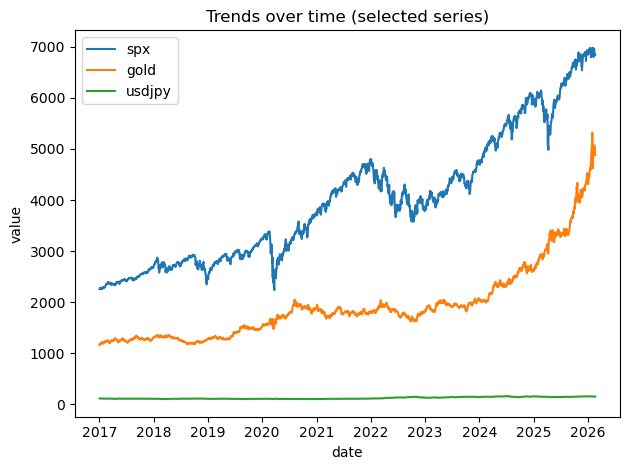

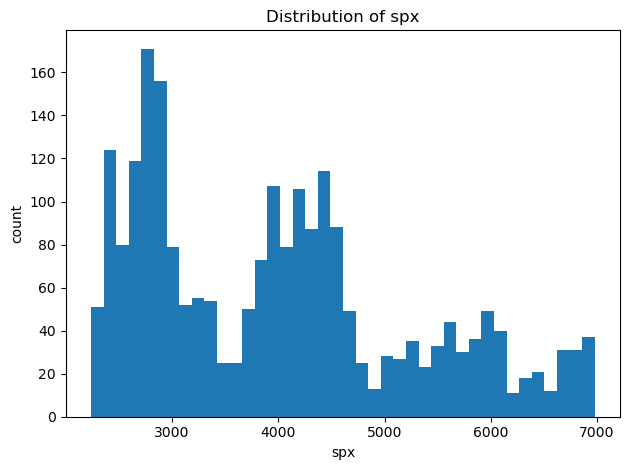

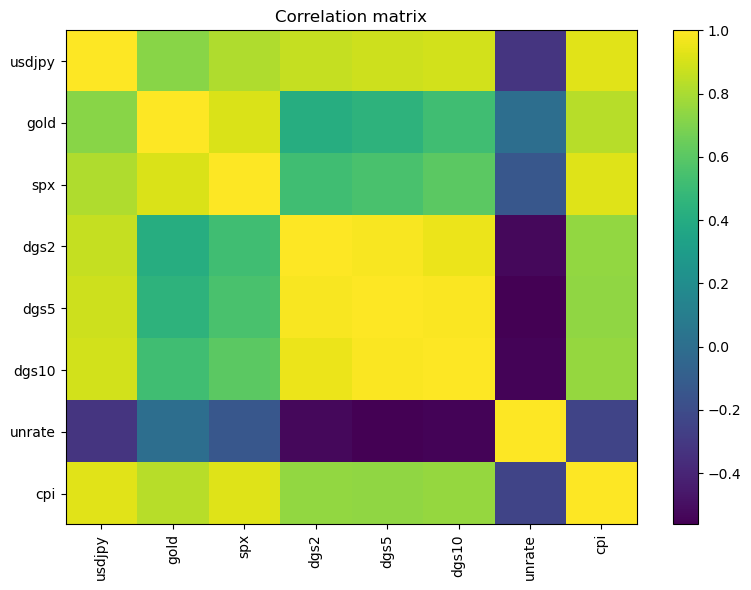

In [5]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#0) Basic setup
# Ensure date is datetime and sorted
merged = merged.copy()
merged["date"] = pd.to_datetime(merged["date"])
merged = merged.sort_values("date")

# Numeric columns (exclude date)
num_cols = merged.select_dtypes(include=[np.number]).columns.tolist()

#1) Trends: time series line
# Plot a few key series (adjust if you want fewer/more)
key_series = [c for c in ["spx", "gold", "usdjpy"] if c in merged.columns]
if len(key_series) == 0:
    key_series = num_cols[:3]  # fallback

plt.figure()
for c in key_series:
    plt.plot(merged["date"], merged[c], label=c)
plt.title("Trends over time (selected series)")
plt.xlabel("date")
plt.ylabel("value")
plt.legend()
plt.tight_layout()
plt.show()

#2) Distribution: histogram
dist_var = "spx" if "spx" in merged.columns else num_cols[0]

plt.figure()
plt.hist(merged[dist_var].dropna(), bins=40)
plt.title(f"Distribution of {dist_var}")
plt.xlabel(dist_var)
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Correlation matrix
corr = merged[num_cols].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr.values, aspect="auto")
plt.title("Correlation matrix")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar(im)
plt.tight_layout()
plt.show()



1. Time Trend Summary for SPX, GOLD, USDJPY
From 2017 to 2026, SPX and gold show a clear upward long-run trend. With noticeable drawdowns and volatility clustering, there is a sharp drop around early 2020. Another visible dip is around 2022. These synchronized regime changes suggest that macro shocks and risk sentiment may simultaneously affect multiple asset classes. In contrast, USDJPY is comparatively range bound relative to SPX/gold in level scale, but it still exhibits a notable regime shift upward after 2022. It is consistent with a higher rate environment and changing FX dynamics. Overall, the time series plots indicate non-stationarity in levels trends and structural breaks, implying that later modeling may benefit from transformations such as returns/differences rather than raw levels.

2. Distribution of SPX.
The SPX level distribution is not symmetric and appears multimodal. This reflects that the index spent long periods in different price regimes. This is expected for a trending financial time series. The histogram mixes multiple market regimes rather than representing a single stable distribution. The wide spread and heavier right tail also indicate that levels are non stationary, so modeling in levels may overemphasize time trend rather than underlying relationships. A practical implication is that return based features may better capture a stable distributional behavior for predictive tasks.

3. Covariance
The correlation matrix shows very strong positive correlations among interest rate variables DGS2/DGS5/DGS10, which indicates that the collinearity across the yield curve is substantial. The unemployment rate UNRATE is negatively correlated with yields and with market variables, which is consistent with counter-cyclically moving trend of unemployment. CPI shows positive correlations with several level variables, which is plausible since CPI is an index that trends upward over time and can co-move with other trending level series. Overall, the matrix suggests that shared time trends can inflate correlations in levels, so subsequent modeling should consider detrending.

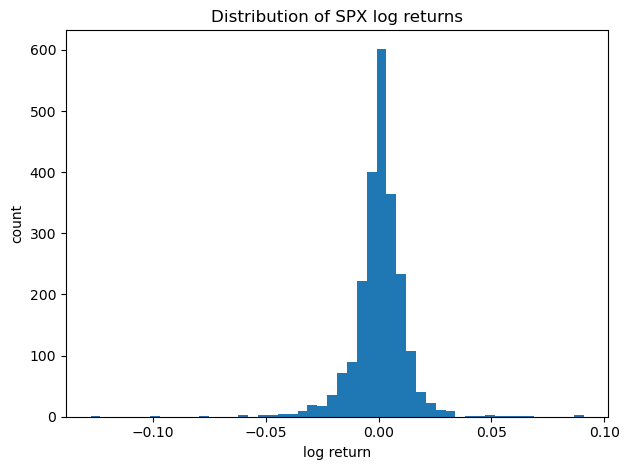

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

merged = merged.copy()
merged["date"] = pd.to_datetime(merged["date"])
merged = merged.sort_values("date")

# log return
merged["spx_ret"] = np.log(merged["spx"]).diff()

plt.figure()
plt.hist(merged["spx_ret"].dropna(), bins=50)
plt.title("Distribution of SPX log returns")
plt.xlabel("log return")
plt.ylabel("count")
plt.tight_layout()
plt.show()

Return of SPX

The histogram of SPX log returns is highly concentrated around zero, indicating that most daily movements are small. At the same time, the distribution shows fat tails, rare but large positive/negative returns, which is typical for financial returns and suggests the presence of extreme market events. We plot logrized returns rather than price levels because the SPX level is strongly trending and non-stationary. Log returns produces a more stable series and makes patterns and anomalies more comparable over time. This observation fuels later preprocessing and feature choices such as using return based targets and considering volatility related features.

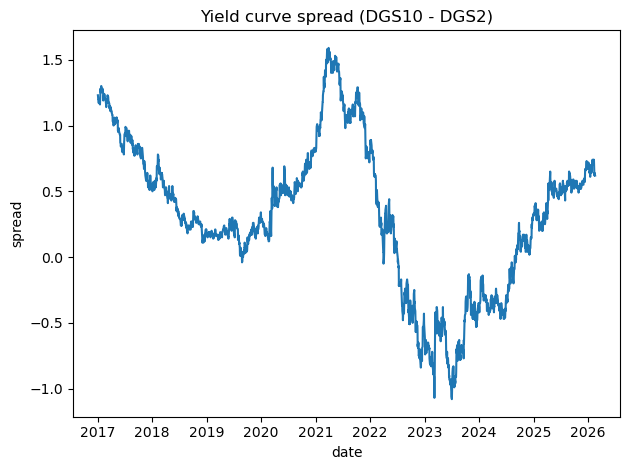

In [7]:
merged["yc_spread"] = merged["dgs10"] - merged["dgs2"]

plt.figure()
plt.plot(merged["date"], merged["yc_spread"])
plt.title("Yield curve spread (DGS10 - DGS2)")
plt.xlabel("date")
plt.ylabel("spread")
plt.tight_layout()
plt.show()

Yield curve spread

We construct the yield curve spread as DGS10 − DGS2 to summarize the slope of the yield curve in a single macro financial indicator. The series transitions from positive values normal upward sloping curve to negative territory, as know as yield curve inversion for a sustained period. This indicates a regime shift in market expectations about future growth and monetary policy. This visualization is useful because the individual yield variables DGS2, DGS5, DGS10 are highly correlated, so using a spread can reduce redundancy and multicollinearity while maintains economic interpretability. In later stages, this spread can serve as a compact feature that captures changes in the macro regime that may relate to movements in risk assets such as equities and FX.

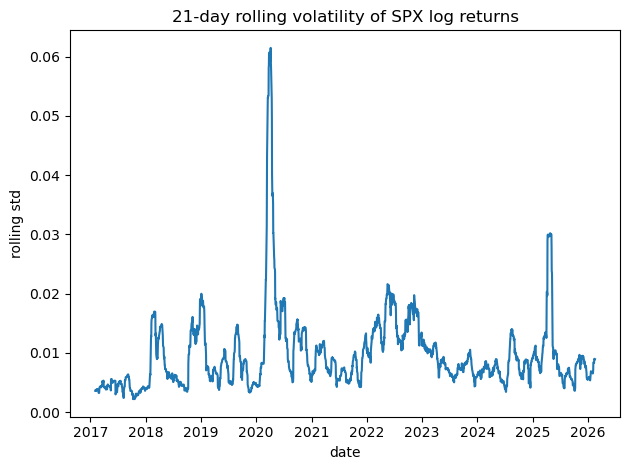

In [8]:
window = 21
merged["spx_vol_21d"] = merged["spx_ret"].rolling(window).std()

plt.figure()
plt.plot(merged["date"], merged["spx_vol_21d"])
plt.title("21-day rolling volatility of SPX log returns")
plt.xlabel("date")
plt.ylabel("rolling std")
plt.tight_layout()
plt.show()

This plot shows the 21 day rolling standard deviation of SPX log returns, which serves as a simple proxy for short term market volatility. The series exhibits clear volatility clustering: long periods of relatively low volatility are interrupted by sharp spikes, which indicates that regime shifts in market uncertainty. The largest spike occurs around early 2020, consistent with a major market shock period, and there is another noticeable spike later in the sample, a episodic riskoff events. We include this visualization because it highlights that the return distribution is not constant over time. Instead, market risk varies by regime. In later stages, rolling volatility can be used as an engineered feature to capture market state and to help models account for time varying risk.

In [9]:
#feature engineering, more analysis on featureandprocess.ipynb
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

df_fe = df.copy()


numeric_cols = df_fe.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_fe.select_dtypes(include=['object', 'category']).columns.tolist()

# Creating skew features and log tansformed features

skewness = df_fe[numeric_cols].skew()
skewed_cols = skewness[skewness > 1].index

for col in skewed_cols:
    df_fe[f"{col}_log"] = np.log1p(df_fe[col])

# interaction fetures, correlated pairs
if len(numeric_cols) > 1:
    corr_matrix = df_fe[numeric_cols].corr().abs()
    pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .sort_values(ascending=False)
    )
    # get top correlated pairs
    top_pairs = pairs.head(min(5, len(pairs))).index
    
    for col1, col2 in top_pairs:
        df_fe[f"{col1}_x_{col2}"] = df_fe[col1] * df_fe[col2]

# get polynomial features
if len(numeric_cols) > 0:
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df_fe[numeric_cols])
    
    poly_feature_names = poly.get_feature_names_out(numeric_cols)
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_fe.index)
    
    # Avoid duplicate columns
    poly_df = poly_df.loc[:, ~poly_df.columns.isin(df_fe.columns)]
    
    df_fe = pd.concat([df_fe, poly_df], axis=1)

# gorup based features
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    group_col = categorical_cols[0]  # use first categorical column
    
    for col in numeric_cols:
        df_fe[f"{col}_group_mean"] = df_fe.groupby(group_col)[col].transform("mean")
        df_fe[f"{col}_group_std"] = df_fe.groupby(group_col)[col].transform("std")
        
        # Relative feature
        df_fe[f"{col}_relative_to_group"] = df_fe[col] / (df_fe[f"{col}_group_mean"] + 1e-6)

# Categorical values
if len(categorical_cols) > 0:
    df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

# standardise
scaler = StandardScaler()
numeric_cols_updated = df_fe.select_dtypes(include=np.number).columns
df_fe[numeric_cols_updated] = scaler.fit_transform(df_fe[numeric_cols_updated])

print("Feature engineering complete.")
# checking new dataset 
print(f"Original shape: {df.shape}")
print(f"New shape: {df_fe.shape}")

Feature engineering complete.
Original shape: (2381, 2)
New shape: (2381, 3)


In [10]:
df_fe.to_csv("final_fe_dataset.csv", index=False)

print("Saved to final_fe_dataset.csv")

Saved to final_fe_dataset.csv
